## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

INFO: Loaded diabetes dataset.
INFO: Random missing values added.
INFO: Summary statistics computed.


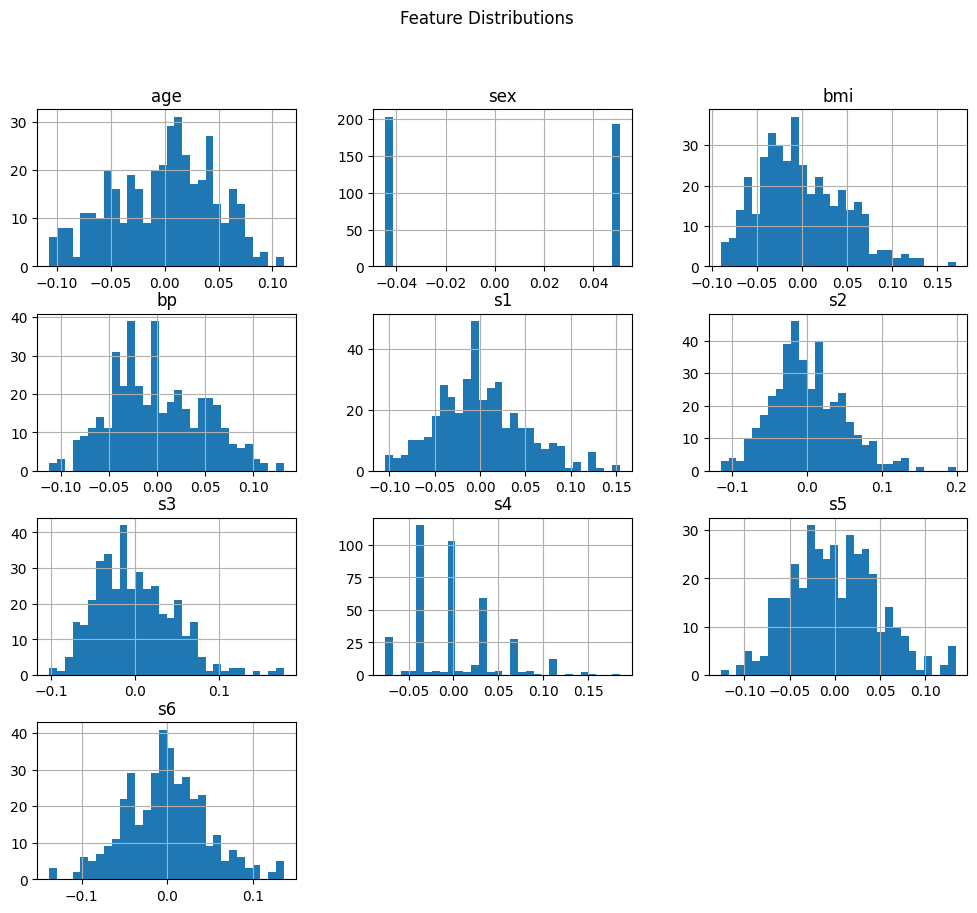

INFO: Missing values per column:
age    47
sex    46
bmi    46
bp     40
s1     43
s2     40
s3     52
s4     54
s5     54
s6     55
dtype: int64
INFO: Missing values filled using mean imputation.
INFO: Outliers capped using vectorized quantile clipping.
INFO: Minmax scaling applied.
INFO: Robust scaling applied.
INFO: Maxabs scaling applied.
INFO: Transformation parameters saved to 'transformation_parameters.json'.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
import json

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Load dataset
try:
    data = load_diabetes()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    logging.info("Loaded diabetes dataset.")
except Exception as e:
    logging.error(f"Error loading dataset: {e}")
    raise

# Simulate missing values
rng = np.random.RandomState(42)
X[rng.rand(*X.shape) < 0.1] = np.nan
logging.info("Random missing values added.")

# Check for numeric columns
if not np.issubdtype(X.dtypes.values[0], np.number):
    raise TypeError("Non-numeric data detected. All columns must be numeric.")

# Summary statistics
summary_stats = X.describe()
logging.info("Summary statistics computed.")

# Visualize distributions
try:
    X.hist(figsize=(12, 10), bins=30)
    plt.suptitle("Feature Distributions")
    plt.show()
except Exception as e:
    logging.warning(f"Failed to plot histograms: {e}")

# Null check
missing_counts = X.isnull().sum()
logging.info(f"Missing values per column:\n{missing_counts}")

# Impute missing values
try:
    imputer = SimpleImputer(strategy="mean")
    X_filled = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    logging.info("Missing values filled using mean imputation.")
except Exception as e:
    logging.error(f"Error during imputation: {e}")
    raise

# Outlier capping using vectorized method
def cap_outliers_vectorized(df, lower_q=0.01, upper_q=0.99):
    lower = df.quantile(lower_q)
    upper = df.quantile(upper_q)
    return df.clip(lower=lower, upper=upper, axis=1)

try:
    X_capped = cap_outliers_vectorized(X_filled)
    logging.info("Outliers capped using vectorized quantile clipping.")
except Exception as e:
    logging.error(f"Error during outlier capping: {e}")
    raise

# Apply all scalers
scalers = {
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
    'maxabs': MaxAbsScaler()
}
scaled_outputs = {}

for name, scaler in scalers.items():
    try:
        scaled = pd.DataFrame(scaler.fit_transform(X_capped), columns=X.columns)
        scaled_outputs[name] = scaled
        logging.info(f"{name.title()} scaling applied.")
    except Exception as e:
        logging.error(f"{name.title()} scaling failed: {e}")

# Save transformation parameters
params = {
    'imputer_statistics': imputer.statistics_.tolist(),
    'minmax_min': scalers['minmax'].data_min_.tolist(),
    'minmax_max': scalers['minmax'].data_max_.tolist(),
    'robust_center': scalers['robust'].center_.tolist(),
    'robust_scale': scalers['robust'].scale_.tolist(),
    'maxabs_max': scalers['maxabs'].max_abs_.tolist()
}

with open('transformation_parameters.json', 'w') as f:
    json.dump(params, f)
logging.info("Transformation parameters saved to 'transformation_parameters.json'.")

## Handle Missing & Inconsistent Data Before Applying ML Models

In [8]:
# Task 4: Drop Missing Values

import unittest
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from main import cap_outliers_vectorized # type: ignore

class TestPreprocessing(unittest.TestCase):
    def setUp(self):
        self.X = pd.DataFrame({
            'A': [1, 2, 3, np.nan, 5, 100],
            'B': [1, 2, 3, 4, np.nan, 6]
        })

    def test_imputer(self):
        imputer = SimpleImputer(strategy='mean')
        X_imp = imputer.fit_transform(self.X)
        self.assertFalse(np.isnan(X_imp).any())

    def test_scaler(self):
        imputer = SimpleImputer(strategy='mean')
        X_imp = pd.DataFrame(imputer.fit_transform(self.X), columns=self.X.columns)
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(X_imp)
        self.assertTrue((scaled >= 0).all() and (scaled <= 1).all())

    def test_outlier_capping(self):
        capped = cap_outliers_vectorized(self.X.fillna(0))
        self.assertFalse((capped > self.X.quantile(0.99)).any().any())

if __name__ == '__main__':
    unittest.main()



# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





ModuleNotFoundError: No module named 'main'

## Choose the Right Scaling Method

In [ ]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






## Keep Track of Data Transformations for Reproducibility

In [ ]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters




